In [1]:
import hydra
import numpy as np
from omegaconf import OmegaConf
from pymongo import MongoClient
import os
from pathlib import Path

from util import load_db, plot_one_col

In [2]:
coreset_type = 'cp'

metrics = [
    'full_mmd', 
]
    
method_record_dict = {
    'Standard': {
        'debias.alg': 'noop',
        'compress.alg': 'std',
        'compress.coreset_type': coreset_type,
        'out_size': 'n**0.5',
    },

    'Stein Thinning': {
        'debias.alg': 'noop',
        'compress.alg': 'st',
        'compress.coreset_type': coreset_type,
        'out_size': 'n**0.5',
    },
}

if coreset_type == 'integer':
    method_record_dict.update({
        'GBC-EQ': {
            'debias.alg': 'st',
            'compress.alg': 'kt',
            'out_size': 'n**0.5',
        },
        'LBC-EQ(r=n**0.4)': {
            'debias.alg': 'lr',
            'debias.rank': 'm',
            'compress.alg': 'cpp',
            'out_size': 'n**0.4',
        },
        'LBC-EQ(r=n**0.5)': {
            'debias.alg': 'lr',
            'debias.rank': 'm',
            'compress.alg': 'cpp',
            'out_size': 'n**0.5',
        },
    })
elif coreset_type == 'simplex':
    method_record_dict.update({
        'GBC-CVX(r=n**0.4)': {
            'debias.alg': 'st',
            'compress.alg': 'recomb',
            'out_size': 'n**0.4',
        },
        'GBC-CVX(r=n**0.5)': {
            'debias.alg': 'st',
            'compress.alg': 'recomb',
            'out_size': 'n**0.5',
        },
        'LBC-CVX(r=n**0.4)': {
            'debias.alg': 'lr',
            'debias.rank': 'm',
            'compress.alg': 'recomb',
            'out_size': 'n**0.4',
        },
        'LBC-CVX(r=n**0.5)': {
            'debias.alg': 'lr',
            'debias.rank': 'm',
            'compress.alg': 'recomb',
            'out_size': 'n**0.5',
        },
    })
else:
    assert(coreset_type == 'cp')
    method_record_dict.update({
        'GBC-CP(r=n**0.4)': {
            'debias.alg': 'st',
            'compress.alg': 'chol',
            'out_size': 'n**0.4',
        },
        'GBC-CP(r=n**0.5)': {
            'debias.alg': 'st',
            'compress.alg': 'chol',
            'out_size': 'n**0.5',
        },
        'LBC-CP(r=n**0.4)': {
            'debias.alg': 'lr',
            'debias.rank': 'm',
            'compress.alg': 'chol',
            'out_size': 'n**0.4',
        },
        'LBC-CP(r=n**0.5)': {
            'debias.alg': 'lr',
            'debias.rank': 'm',
            'compress.alg': 'chol',
            'out_size': 'n**0.5',
        },
    })

ns = [1024, 4096, 16384, 65536, 262144, 1048576]
seeds = [1, 2, 3, 4, 5]
cur_dict = method_record_dict.copy()
for method in cur_dict:
    cur_dict[method]['problem.folder'] = f'../../../riabiz_data/Cardiac/Tempered_posterior/seed_1'
loaded_result = load_db(
    'temper', 
    method_record_dict=cur_dict,
    ns=ns, n_key='problem.num_sample',
    seeds=seeds, seed_key='problem.seed',
    metrics=metrics)

Found 0 matches for record = {'_stage': 'final', 'problem.num_sample': 1048576, 'problem.seed': 1, 'debias.alg': 'st', 'compress.alg': 'chol', 'problem.folder': '../../../riabiz_data/Cardiac/Tempered_posterior/seed_1', 'compress.out_size': 257}!
Record not found!
Found 0 matches for record = {'_stage': 'final', 'problem.num_sample': 1048576, 'problem.seed': 2, 'debias.alg': 'st', 'compress.alg': 'chol', 'problem.folder': '../../../riabiz_data/Cardiac/Tempered_posterior/seed_1', 'compress.out_size': 257}!
Record not found!
Found 0 matches for record = {'_stage': 'final', 'problem.num_sample': 1048576, 'problem.seed': 3, 'debias.alg': 'st', 'compress.alg': 'chol', 'problem.folder': '../../../riabiz_data/Cardiac/Tempered_posterior/seed_1', 'compress.out_size': 257}!
Record not found!
Found 0 matches for record = {'_stage': 'final', 'problem.num_sample': 1048576, 'problem.seed': 4, 'debias.alg': 'st', 'compress.alg': 'chol', 'problem.folder': '../../../riabiz_data/Cardiac/Tempered_posterio

xlim for full_mmd: (16.0, 1256.8762168437413)
ylim for full_mmd: (0.47289382844151945, 3668.7716382121475)


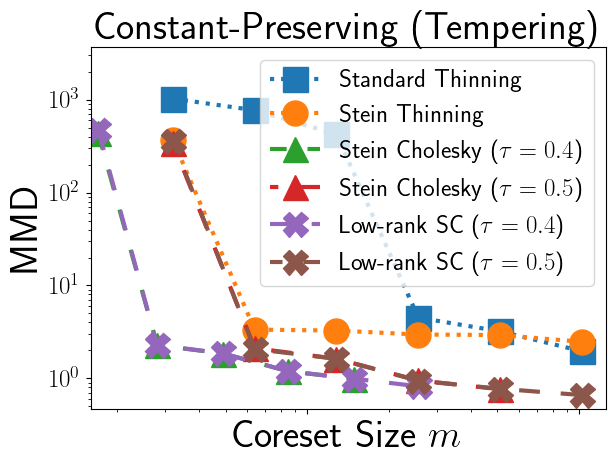

In [3]:
coreset_type_to_title = {
    'integer': 'Equal-Weighted (Tempering)',
    'simplex': 'Simplex-Weighted (Tempering)',
    'cp': 'Constant-Preserving (Tempering)'
}

metric_y_lim = {
    'full_mmd': (0.47289382844151945, 3668.7716382121475),
    'final_ed': (0.15072449957210451, 0.154),
}
x_lim = (16, 1256.8762168437413)

plot_one_col(loaded_result, metrics, coreset_type_to_title[coreset_type], 
            log_x_axis=True, figsize=5, aspect=1.3,
            save_path=f'temper_{coreset_type}.pdf', metric_y_lim=metric_y_lim, x_lim=x_lim)